<a href="https://colab.research.google.com/github/roderikmogot/automatic-temperature-conversion/blob/main/08%20-%20NLP%20-%20Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - Fundamentals

NLP has the goal of deriving information out of natural language (could be sequences of text and speech).

Another common for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-1eac1bc7-7d66-c3da-346e-516a44b71645)


## Get helper functions

In [2]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py

--2021-09-18 09:12:00--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2021-09-18 09:12:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-18 09:12:01 (65.7 MB/s) - ‘helper_func

In [3]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled with disaster or not).

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-09-18 09:12:03--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2021-09-18 09:12:04 (82.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Unzip the data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [6]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# How many samples are there?
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples(): # itertuples converts the dataframe to tuples
  _, text, target = row # _ indicates to skip a column
  print(f"Target: {target}", "real disaster" if target > 0 else "not real disaster")
  print(f"Text:\n{text}\n")
  print(f"---\n")

Target: 0 not real disaster
Text:
If you dotish to blight your car go right ahead. Once it's not mine.

---

Target: 1 real disaster
Text:
the pastor was not in the scene of the accident......who was the owner of the range rover ?

---

Target: 1 real disaster
Text:
The shooting or the airplane accident  https://t.co/iECc1JDOub

---

Target: 1 real disaster
Text:
@Eazzy_P we will never know what would have happened but the govt seemed to think that their beliefs warranted the deaths of innocent japs

---

Target: 1 real disaster
Text:
Happy no one was hurt when #wmata train derailed. Also the express bus is so much better than metro rail http://t.co/7cEhNV3DKy @fox5newsdc

---



### Split data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [14]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [15]:
# Check the first 10 samples 
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, normally:
1. **Tokenization** - word level, maps each word for e.g. "Im eating sandwich", stores 0 for Im, 1 for eating, 2 for sandwich (could also use one hot encoding).

2. **Embedding** - create a matrix of feature vectors for each token (the size of the feature vector can be defined and this embedding can be learned).

### Using tokenization (text vectorization)

In [16]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# This is the default TextVectorization paramters
text_vectorizer = TextVectorization(max_tokens=None, # how many different words in the vocabulary (automatically add <OOV> if max token has reached its limit)
                                    standardize='lower_and_strip_punctuation', 
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words
                                    output_mode="int", # how to map your tokens to numbers
                                    output_sequence_length=None, # how long do you want sequences to be
                                    pad_to_max_tokens=True) 

ValueError: ignored

In [18]:
len(train_sentences[0].split())

7

In [19]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
# Setup text vectorization
max_vocab_length = 10000 # max numbers of words in our vocab
max_length = 15 # max length our sequences will be (e.g. how many words from a tweet does a model seek)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
# Fit the text vectorizer to the training set
text_vectorizer.adapt(train_sentences)

In [22]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text\n{random_sentence}\n\nVectorized version:")
print(text_vectorizer([random_sentence]))

Original text
California meets drought-fueled fire season with extra crews.. Related Articles: http://t.co/rKDzB0TGC3

Vectorized version:
tf.Tensor(
[[  90 5143    1   42 1178   14 2464  689 1779 1902    1    0    0    0
     0]], shape=(1, 15), dtype=int64)


In [24]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in the training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"List of the 5 top words: {top_5_words}")
print(f"List of the 5 bottom words: {bottom_5_words}")

List of the 5 top words: ['', '[UNK]', 'the', 'a', 'in']
List of the 5 bottom words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Create an Embedding using an Embedding Layer

To make our embedding, we're going to use TensorFlow's Embedding Layer.

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # a good practice to set the numbers divisible by 8 (output shape)
                             input_length=max_length) # how long is each input
embedding

In [26]:
# Get a random sentences from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\n\nEmbedded version:")

# Embed the random sentence (turns it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence])) # turn into integers then embed the random sentence
sample_embed

Original text:
 susinesses are deluged with invoices. Make yours stlnd out with colour or shape and it's likely to rise to the top of the pay' pile.

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00691108, -0.00782676,  0.0147694 , ..., -0.04310591,
         -0.04552805,  0.00256777],
        [-0.04588201, -0.0317698 ,  0.02792605, ..., -0.0166314 ,
         -0.01492382,  0.04244467],
        [ 0.00971549, -0.02994233,  0.01027115, ...,  0.03404461,
          0.00729141,  0.02569329],
        ...,
        [ 0.00054801, -0.0133189 , -0.03000474, ..., -0.01421776,
         -0.03873118, -0.00518841],
        [-0.03449676,  0.01783656, -0.00612562, ...,  0.00969211,
         -0.0066619 , -0.01365345],
        [ 0.02778114, -0.01704999, -0.00345463, ..., -0.0263183 ,
          0.03658184, -0.03174262]]], dtype=float32)>

Each word in a sentence has a length of 128 and is a vector.

In [27]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00691108, -0.00782676,  0.0147694 ,  0.02873111, -0.02741044,
        -0.03764116, -0.04454966, -0.03647185,  0.0025202 ,  0.04421909,
        -0.02993305, -0.03908554,  0.01613769, -0.01351248,  0.03852317,
         0.0294502 ,  0.03608694, -0.01226425,  0.03618859, -0.04985463,
        -0.03357176, -0.04119073,  0.00384299, -0.01024977,  0.02252466,
         0.01239013,  0.02010765,  0.03902057, -0.00280292, -0.02559382,
         0.04588095, -0.00696503, -0.03715334, -0.02911392,  0.04047424,
        -0.02802223,  0.03660976, -0.04217859,  0.00852468,  0.02073598,
         0.01391752,  0.04342164, -0.0105917 , -0.02029556, -0.03196885,
        -0.01859771,  0.04979551,  0.03796807,  0.00044675, -0.04248176,
        -0.04352742,  0.02990786,  0.02801854,  0.03384629,  0.01475144,
        -0.0060787 , -0.00779483,  0.02998673, -0.03863081,  0.00517789,
        -0.01369055, -0.0104328 , -0.00472982, -0.04472429, -0.03495333,
  

## Modelling a text dataset (and running a set of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

![](https://raw.githubusercontent.com/roderikmogot/csv/main/Screen%20Shot%202021-09-17%20at%2013.00.21.png)

Note: The guideline for creating a model is not as precise as what we need. These are just references. It may change according to your needs.

How are we going to approach all of these?
* Create the model
* Build the model
* Compile the model
* Fit the model
* Evaluate the model

### Model 0: Getting a baseline

Using sklearn's Multinominal Naive Bayes using the TF-IDF formula to convert our words into numbers.

> It is common practice to use non-DL algorithms as a baseline because of their speed, then later use DL if we can improve upon them.


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
  ("tfidf", TfidfVectorizer()), # convert words to numbers using TF-IDF
  ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
# Evaluate our base line model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieve an accuracy score of {baseline_score*100:.2f}%")

Our baseline model achieve an accuracy score of 79.27%


In [30]:
# Make predictions for base model
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

#### Creating an evaluation function for our modelling experiments

This includes:
* Accuracy
* Precision
* Recall
* F1-score

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates a model accuracy, precision, recall, f1 score of a binary classification model.
  """

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # Calculate model precision, recall and f1-score
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted") # skip for support
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [32]:
# Get baseline results
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: Feed-forward neural network (dense model)

In [33]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [34]:
# Using the Functional API
from tensorflow.keras import layers

# shape = seek one sequence at a time
# inputs are 1-dimensional strings
inputs = layers.Input(shape=(1,), dtype=tf.string) 

# turn the input text into numbers
x = text_vectorizer(inputs)

# turn our numbers into embedding
x = embedding(x)

# condense the feature vector each token to one vector
# 1d is for sequential data (texts, etc)
x = layers.GlobalAveragePooling1D()(x)
# x = layers.GlobalMaxPooling1D()(x)

# Create the output, since we are dealing with binary classification,
# the hidden unit should be 1 and activation is sigmoid
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")


In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [37]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20210918-091244
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.6097 - accuracy: 0.6964 - val_loss: 0.5337 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4425 - accuracy: 0.8174 - val_loss: 0.4708 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3460 - accuracy: 0.8640 - val_loss: 0.4687 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2847 - accuracy: 0.8907 - val_loss: 0.4679 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2378 - accuracy: 0.9108 - val_loss: 0.4758 - val_accuracy: 0.7822


In [38]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7822


[0.4757738411426544, 0.7821522355079651]

In [39]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:1]

array([[0.38771936]], dtype=float32)

It's not in the right format, it's actually predicting on each tokens (when not adding `GlobalAveragePooling1D` / `GlobalMaxPooling1D` layer).

In [40]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [41]:
# Calculate our model_1 results
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 78.21522309711287,
 'f1': 0.7795215466562155,
 'precision': 0.7856661242905698,
 'recall': 0.7821522309711286}

In [42]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

As we can see, the baseline result is still higher than most of `model_1`'s evaluation metrics.

## Visualizing learned embeddings

In [43]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [44]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data , which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape # same size as vocab size and embedding dim

(10000, 128)

Now we've got the embdding matrix our model has learned to represent our tokens, let's see how we can visualize it..

TensorFlow Projector: https://projector.tensorflow.org/

In [46]:
embed_weights

array([[-0.04038535,  0.03420018,  0.00450342, ..., -0.01996917,
        -0.00285624, -0.05126059],
       [ 0.02640555,  0.00330343,  0.02252487, ...,  0.02207453,
        -0.0333004 , -0.02817232],
       [ 0.05701675, -0.02700342,  0.04861306, ...,  0.00129554,
        -0.00276819, -0.02809346],
       ...,
       [ 0.04971788,  0.04712025,  0.00607764, ..., -0.0489416 ,
         0.02565788,  0.02764216],
       [ 0.03394805,  0.04099939,  0.05055056, ..., -0.05841227,
        -0.07896879, -0.02528039],
       [ 0.02575956,  0.09229694,  0.09899379, ..., -0.04370059,
        -0.08375761, -0.06667635]], dtype=float32)

In [47]:
# Create embedding files (from TF word embeddings docs)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [48]:
# Download files from colab to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network

RNN's are useful for sequence data (like text).

The premise of a recurrent neural network is to use the representation
of a previous input to aid the representation of a later input.

"The premise of" in RNN reads the "The"  for a representation of "premise" then later uses "The premise" as a representation to represent "of" and so on.

> An overview of recurrent neural network:
* MIT - https://youtu.be/qjrad0V0uJE
* Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences - http://karpathy.github.io/2015/05/21/rnn-effectiveness/
* Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block - https://colah.github.io/posts/2015-08-Understanding-LSTMs/

### Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:
```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/dense) -> Output (label probability)
```

In [49]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)

# when you're stacking RNN cells together, you need to return_sequences=True
x = layers.LSTM(units=64, return_sequences=True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)

x = layers.Dense(64, activation="relu")(x)
# print(x.shape)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [50]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [51]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [52]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20210918-091257
Epoch 1/5
215/215 [==============================] - 11s 22ms/step - loss: 0.2297 - accuracy: 0.9223 - val_loss: 0.5740 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1592 - accuracy: 0.9412 - val_loss: 0.7512 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1326 - accuracy: 0.9515 - val_loss: 0.7419 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1065 - accuracy: 0.9609 - val_loss: 0.9135 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0873 - accuracy: 0.9656 - val_loss: 0.8727 - val_accuracy: 0.7822


In [53]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[7.0068501e-03],
       [7.8592575e-01],
       [9.9988711e-01],
       [8.2312226e-03],
       [2.1613749e-04],
       [9.9361527e-01],
       [8.0835283e-01],
       [9.9991417e-01],
       [9.9976236e-01],
       [3.0117580e-01]], dtype=float32)

In [54]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [55]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [56]:
# Calculate model 2 results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 78.21522309711287,
 'f1': 0.7789371307867892,
 'precision': 0.7872762884426117,
 'recall': 0.7821522309711286}

In [57]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

Our baseline is still higher the RNN model.

### Model 3: GRU

Another popular and effective RNN component is the GRU or Gated Recurrent Unit.

It has similar features to an LSTM cell but has less parameters.

In [58]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)

x = layers.GRU(64)(x)

# if you want to stack recurrent layers on top of each other, return_sequences=True
# x = layers.GRU(64, return_sequences=True)(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x)
# print(x.shape)

# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

Always check the shape of each layer when facing problems/errors.

In [59]:
# Model 3 summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [61]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20210918-091322
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.1535 - accuracy: 0.9402 - val_loss: 0.7355 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0839 - accuracy: 0.9691 - val_loss: 0.7293 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0735 - accuracy: 0.9712 - val_loss: 0.9628 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0633 - accuracy: 0.9743 - val_loss: 1.0009 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0543 - accuracy: 0.9750 - val_loss: 1.0399 - val_accuracy: 0.7717


In [62]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:5]

array([[8.0383457e-03],
       [7.2788584e-01],
       [9.9988306e-01],
       [4.8031613e-02],
       [1.2593989e-04]], dtype=float32)

In [63]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [64]:
# Model 3 results
results_model_3 = calculate_results(val_labels, model_3_preds)
results_model_3

{'accuracy': 77.16535433070865,
 'f1': 0.7702930138828643,
 'precision': 0.7720646185150423,
 'recall': 0.7716535433070866}

It's lower than our base model.

### Model 4: Bidirectional-LSTM

Normal RNN's go from left to right (just like reading a sentence). However, bidirectional RNN goes from left to right as well as left to right.

In [65]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [66]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
___________________________________

Bidirectional is going from left to right and right to left so it goes 2 directions (double the value of 64 which is 128).

In [67]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [68]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20210918-091338
Epoch 1/5
215/215 [==============================] - 14s 34ms/step - loss: 0.0979 - accuracy: 0.9661 - val_loss: 1.1088 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0604 - accuracy: 0.9750 - val_loss: 1.3698 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0499 - accuracy: 0.9790 - val_loss: 1.2618 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0439 - accuracy: 0.9794 - val_loss: 1.4324 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0382 - accuracy: 0.9810 - val_loss: 1.5880 - val_accuracy: 0.7703


In [69]:
# Make predictions with model 4
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[9.0517446e-05],
       [8.7789804e-01],
       [9.9990690e-01],
       [1.4385673e-01],
       [6.3468683e-06],
       [9.9972540e-01],
       [9.7327709e-01],
       [9.9993312e-01],
       [9.9990070e-01],
       [9.9701846e-01]], dtype=float32)

In [70]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
# Calculate model 4 results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 77.03412073490814,
 'f1': 0.768571140634933,
 'precision': 0.7713700595744248,
 'recall': 0.7703412073490814}

It still has not beat our baseline.

## CNN for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D, however, our text data is 1D.

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D, Pooling) -> Outputs (class probability)
```

### Model 5: Conv1D

In [72]:
# Test out our embedding layer, Conv1D and MaxPooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn sequences into embeddings
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # looks at 5 words at a time (referred to as an ngram of 5)
                        strides=1, # default
                        activation="relu",
                        padding="valid") # default = `valid`, the output is smaller than the input shape, `same` means the same shape as the input
conv_1d_output = conv_1d(embedding_test) # pass test embedding to conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_outputs = max_pool(conv_1d_output) # get the most important feature (highest value)

embedding_test.shape, conv_1d_output.shape, max_pool_outputs.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

15 becomes 11 is the effect from the `padding` which is `valid`.

In [73]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.06834625,  0.01857894,  0.02726735, ...,  0.0447961 ,
         -0.01110186, -0.02441898],
        [-0.02775057,  0.02696397,  0.02623237, ...,  0.01271159,
          0.02439389,  0.02277542],
        [ 0.02112631, -0.03437128, -0.02020492, ...,  0.04811535,
          0.02794605, -0.03309525],
        ...,
        [-0.01272911,  0.01913165,  0.0103587 , ..., -0.0073108 ,
         -0.01315095, -0.0092319 ],
        [-0.01272911,  0.01913165,  0.0103587 , ..., -0.0073108 ,
         -0.01315095, -0.0092319 ],
        [-0.01272911,  0.01913165,  0.0103587 , ..., -0.0073108 ,
         -0.01315095, -0.0092319 ]]], dtype=float32)>

In [74]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.        , 0.0219211 ,
         0.07322308, 0.        , 0.00932742, 0.        , 0.        ,
         0.05983726, 0.03443365, 0.        , 0.        , 0.01858686,
         0.        , 0.        , 0.0324249 , 0.04247432, 0.        ,
         0.        , 0.        , 0.00189968, 0.        , 0.        ,
         0.04064514, 0.        , 0.02927449, 0.        , 0.10891869,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.02095161, 0.09054084, 0.02607304, 0.0058636 , 0.01596982,
         0.07574125, 0.06468708, 0.04892814, 0.0293919 , 0.        ,
         0.        , 0.        , 0.02770379, 0.0673148 , 0.03604815,
         0.0248731 , 0.01396381, 0.06471038, 0.        , 0.        ,
         0.03579373, 0.        , 0.        , 0.002567  , 0.02352376,
         0.        , 0.03636532],
        [0.04436423, 0.        , 0.        , 0.    

Why it has many zeros?

`relu` converts negative to integers to zero.

In [75]:
max_pool_outputs

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.04436423, 0.01304491, 0.03996251, 0.01062249, 0.0219211 ,
        0.07322308, 0.09054084, 0.03110426, 0.0058636 , 0.05283885,
        0.07574125, 0.06468708, 0.04892814, 0.05806279, 0.01858686,
        0.00134525, 0.0263267 , 0.08787352, 0.0673148 , 0.04301447,
        0.0248731 , 0.01396381, 0.06471038, 0.03811498, 0.06195664,
        0.04064514, 0.        , 0.02927449, 0.002567  , 0.10891869,
        0.        , 0.05287734]], dtype=float32)>

In [76]:
# Build our CNN 1D model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  strides=1,
                  activation="relu",
                  padding="valid")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_CNN1D")

In [77]:
# Get the summary
model_5.summary()

Model: "model_5_CNN1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
___________________________________________

In [78]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

In [79]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_CNN1D")])

Saving TensorBoard log files to: model_logs/model_5_CNN1D/20210918-091439
Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.1552 - accuracy: 0.9472 - val_loss: 0.8873 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0880 - accuracy: 0.9670 - val_loss: 1.0189 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0676 - accuracy: 0.9726 - val_loss: 1.2018 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0584 - accuracy: 0.9759 - val_loss: 1.3440 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0514 - accuracy: 0.9777 - val_loss: 1.4574 - val_accuracy: 0.7507


In [80]:
# Make predictions using CNN1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5]

array([[4.1498628e-01],
       [8.4173256e-01],
       [9.9999666e-01],
       [9.6500017e-02],
       [3.7146275e-08]], dtype=float32)

In [81]:
# Convert our predictions
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
# Evaluate model 5 results
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 75.06561679790026,
 'f1': 0.7500861597764454,
 'precision': 0.7501834475789994,
 'recall': 0.7506561679790026}

It still has not beat our baseline.

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Using transfer learning for NLP, specifically using TF Hub Universal Sentence Encoder.

Great resources for feature extraction:
* TensorFlow Hub
* Hugging Face (https://huggingface.com/models)

In [83]:
sample_sentence

"There's a flood in my street!"

In [84]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence, "When you call the universal sentence encoder on a sentences, it turns it into numebers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157024  0.0248591   0.0287805  -0.01271502  0.03971543  0.08827759
  0.02680986  0.05589837 -0.01068731 -0.0059729   0.00639324 -0.01819523
  0.00030817  0.09105891  0.05874644 -0.03180627  0.01512476 -0.05162928
  0.00991369 -0.06865346 -0.04209306  0.0267898   0.03011008  0.00321069
 -0.00337969 -0.04787359  0.02266718 -0.00985924 -0.04063614 -0.01292095
 -0.04666384  0.056303   -0.03949255  0.00517685  0.02495828 -0.07014439
  0.02871508  0.04947682 -0.00633971 -0.08960191  0.02807117 -0.00808362
 -0.01360601  0.05998649 -0.10361786 -0.05195372  0.00232955 -0.02332528
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


In [85]:
# Create a Keras Layer using the USE pretraiend layer from TF Hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # 
                                        dtype="string", 
                                        trainable=False,
                                        name="USE")

In [86]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

# Get the summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [87]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210918-091515
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.5048 - accuracy: 0.7841 - val_loss: 0.4502 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4141 - accuracy: 0.8146 - val_loss: 0.4379 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4020 - accuracy: 0.8212 - val_loss: 0.4360 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3941 - accuracy: 0.8263 - val_loss: 0.4306 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3872 - accuracy: 0.8264 - val_loss: 0.4278 - val_accuracy: 0.8136


In [88]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.16432972],
       [0.8326194 ],
       [0.9904422 ],
       [0.19454592],
       [0.78827316],
       [0.7703925 ],
       [0.98388493],
       [0.9840136 ],
       [0.9521202 ],
       [0.1067033 ]], dtype=float32)

In [89]:
# Convert predictions probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10] 

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [90]:
# Evaluate model 6
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'f1': 0.8126248998925568,
 'precision': 0.8145308821695579,
 'recall': 0.8136482939632546}

It merely beats the baseline, but we're still not satisfied.

After adding `layers.Dense(64, activation="relu")`, it slightly beats the baseline.

In [91]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 7: TF Hub Pretrained but with 10% of training data

Transfer learning really helps when you have a large dataset.

To see how our model performs on a smaller dataset, let's try to run the model with 10% of the data.

In [92]:
## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 train on 100% data)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION DATA/TEST SETS INTO TRAINING SET

# Create subsets of 10% of the training data
# train_10_precent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_precent["text"].to_list()
# train_labels_10_percent = train_10_precent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [93]:
# Making a better dataset (no data leakage)
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [113]:
# Check the number of targets in our subset of data
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [97]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [98]:
# Create model 7 just like model 6
# can also clone model 6 using TF's clone method
model_7 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_7_10_percent_data")

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])

# Get the summary
model_7.summary()

Model: "model_7_10_percent_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [99]:
# Fit the model with 10 percent of the data
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_USE_10_percent_data_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_USE_10_percent_data_correct_split/20210918-091623
Epoch 1/5
22/22 [==============================] - 4s 120ms/step - loss: 0.6668 - accuracy: 0.6964 - val_loss: 0.6440 - val_accuracy: 0.7467
Epoch 2/5
22/22 [==============================] - 1s 31ms/step - loss: 0.5971 - accuracy: 0.8102 - val_loss: 0.5833 - val_accuracy: 0.7835
Epoch 3/5
22/22 [==============================] - 1s 31ms/step - loss: 0.5235 - accuracy: 0.8146 - val_loss: 0.5345 - val_accuracy: 0.7835
Epoch 4/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4638 - accuracy: 0.8161 - val_loss: 0.4996 - val_accuracy: 0.7808
Epoch 5/5
22/22 [==============================] - 1s 46ms/step - loss: 0.4228 - accuracy: 0.8350 - val_loss: 0.4883 - val_accuracy: 0.7835


In [100]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.19673628],
       [0.60231924],
       [0.9088641 ],
       [0.39533937],
       [0.547047  ],
       [0.6754062 ],
       [0.8819838 ],
       [0.80583024],
       [0.82581735],
       [0.14969134]], dtype=float32)

In [101]:
# Convert predictions to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [102]:
# Evaluate model 7 metrics
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 78.34645669291339,
 'f1': 0.7811856084066165,
 'precision': 0.7861644127328657,
 'recall': 0.7834645669291339}

`model_7` with 10 percent of the data performs slightly better than `model_6`... something doesn't feel right..

What is actually happening here is that we managed to get some of the validation data to the training data because we import them from the same dictionary which is `train_data_shuffled`, which is like cheating (data leaks). 

It should perform slightly less than the actual training data (100% of the data).


In [112]:
model_6_results

{'accuracy': 81.36482939632546,
 'f1': 0.8126248998925568,
 'precision': 0.8145308821695579,
 'recall': 0.8136482939632546}

## Comparing the performance of each of our models

In [103]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": results_model_3,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.215223,0.785666,0.782152,0.779522
2_lstm,78.215223,0.787276,0.782152,0.778937
3_gru,77.165354,0.772065,0.771654,0.770293
4_bidirectional,77.034121,0.771370,0.770341,0.768571
5_conv1d,75.065617,0.750183,0.750656,0.750086
6_tf_hub_use_encoder,81.364829,0.814531,0.813648,0.812625
7_tf_hub_use_encoder_10_percent_data,78.346457,0.786164,0.783465,0.781186


In [104]:
# Reduce the accuracy to the same scales as other metrics
all_model_results['accuracy'] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.782152,0.785666,0.782152,0.779522
2_lstm,0.782152,0.787276,0.782152,0.778937
3_gru,0.771654,0.772065,0.771654,0.770293
4_bidirectional,0.770341,0.771370,0.770341,0.768571
5_conv1d,0.750656,0.750183,0.750656,0.750086
6_tf_hub_use_encoder,0.813648,0.814531,0.813648,0.812625
7_tf_hub_use_encoder_10_percent_data,0.783465,0.786164,0.783465,0.781186


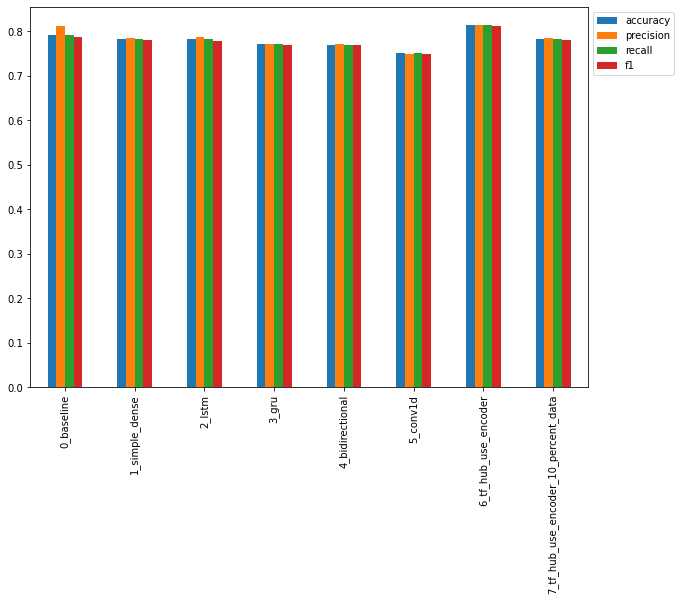

In [105]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

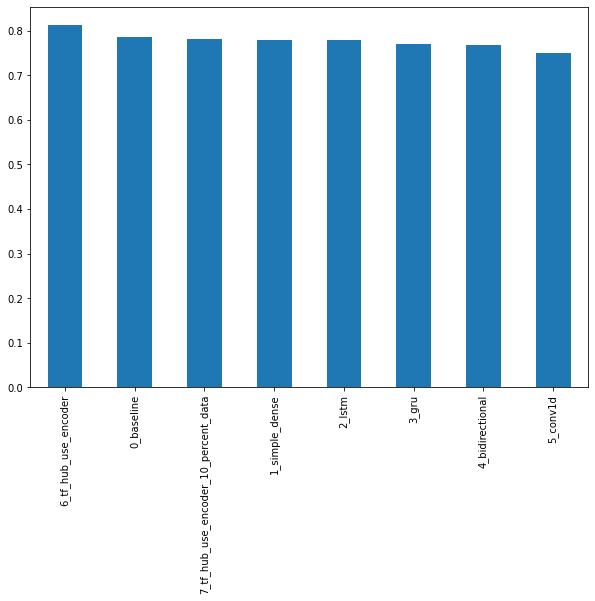

In [106]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

## Uploading our model training logs to TensorBoard.dev

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments from NLP Getting Started dataset (Kaggle)" \
  --description "A brief practice and understanding of NLP as a beginner" \
  --one_shot

The experiment results: https://tensorboard.dev/experiment/s8NXlmxAQz6GdB9JY5SOmw/

## The speed/score tradeoff

Would you want to use a model that has the best acurracy but slow to predict or choose a model that is fast to predict but is low on accuracy?

In [107]:
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [108]:
# Calculate TF Hub USE time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.35138246200000367, 0.00046113183989501794)

In [109]:
# Calculate our baseline model times per pred
model_0_total_pred_time, model_0_time_per_pred = pred_timer(model_0, val_sentences)
model_0_total_pred_time, model_0_time_per_pred

(0.03341939699998875, 4.385747637793799e-05)

Our baseline model is faster than our USE TF Hub model.

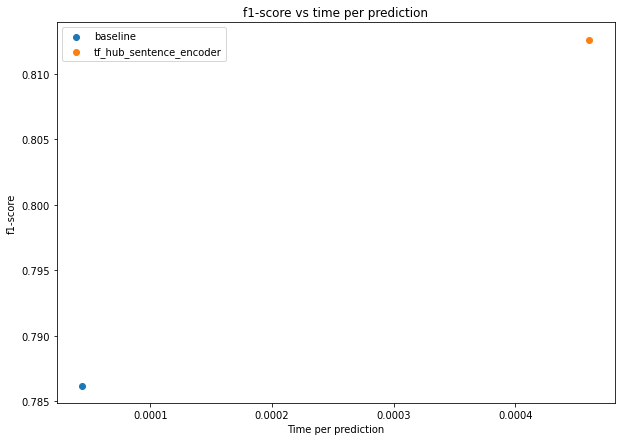

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(model_0_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results['f1'], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("f1-score vs time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("f1-score");

*Is it worth to use the fastest model but slighty worse rate or use the best accuracy model with slightly slower prediction?*